In [1]:
# some basic setup
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import statsmodels.api as sm
import textwrap
from statsmodels.stats.outliers_influence import summary_table
from datetime import datetime
%matplotlib inline

roldf = df = pd.read_csv("rol-scores.csv")
tsdf = pd.read_csv("unemployment.csv").iloc[:, : 3]
tsdf["Year"] = tsdf["Year"].apply(lambda x: datetime.strptime(x, '%Y %b').date())

In [2]:
roldf.head()

,State,Pop. In Millions for 2012,RoLScore,elec_pros,pol_plur,free_expr,assoc_org,per_auto,2012GDP,hprop,hfisc,hbiz,hlab,htra,hinv
0,Albania,3.2,42.60,8,10,13,8,9,1.264810e+10,30,92.6,81.0,49.0,79.8,65
1,Argentina,41.1,51.94,11,15,14,11,13,4.755020e+11,15,64.3,60.1,47.4,67.6,40
2,Australia,22.7,73.28,12,15,16,12,15,1.532410e+12,90,66.4,95.5,83.5,86.2,80
3,Austria,8.4,73.15,12,15,16,12,15,3.947080e+11,90,51.1,73.6,80.4,86.8,85
4,Bangladesh,154.7,31.57,9,11,9,8,9,1.163550e+11,20,72.7,68.0,51.9,54.0,55


In [3]:
tsdf.head()

,Year,Unemployment Rate,Accommodation and food services Quit rate
0,2001-01-01,4.2,6.4
1,2001-02-01,4.2,5.4
2,2001-03-01,4.3,5.4
3,2001-04-01,4.4,5.2
4,2001-05-01,4.3,5.3


In [4]:
def remove_chart_junk(axis, numticks, labelsize):

    # reduce ticks
    axis.locator_params(nbins=numticks)

    # remove unnecessary borders
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['left'].set_color((0.1, 0.1, 0.1, 0.2))
    axis.spines['bottom'].set_color((0.1, 0.1, 0.1, 0.2))

    # prettify tick labels
    axis.tick_params(axis='both',
                     which='both',
                     length=0,
                     labelsize=labelsize,
                     pad=labelsize * 0.66,
                     labelcolor=(0.25, 0.25, 0.25))
    return axis

In [11]:
class PlottyFig(matplotlib.figure.Figure):
    def change_title(self, title):
        self._axstack.as_list()[0].set_title(title)

    def get_main_plot(self):
        return self._axstack.as_list()[0]

In [12]:
def boxplot(variables,
            labels,
            title="",
            numticks=3,
            labelsize=14,
            size=(10, 10),
            font="Lato",
            notch=True):
    arrays = [np.sort(np.array(x)) for x in variables]

    fig = plt.figure(figsize=size, FigureClass=PlottyFig)
    ax = fig.add_subplot(1, 1, 1)

    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname=font)

    ax = remove_chart_junk(ax, numticks, labelsize)

    bp = ax.boxplot(arrays, notch=notch, sym="k.", labels=labels)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color="black")
    return fig


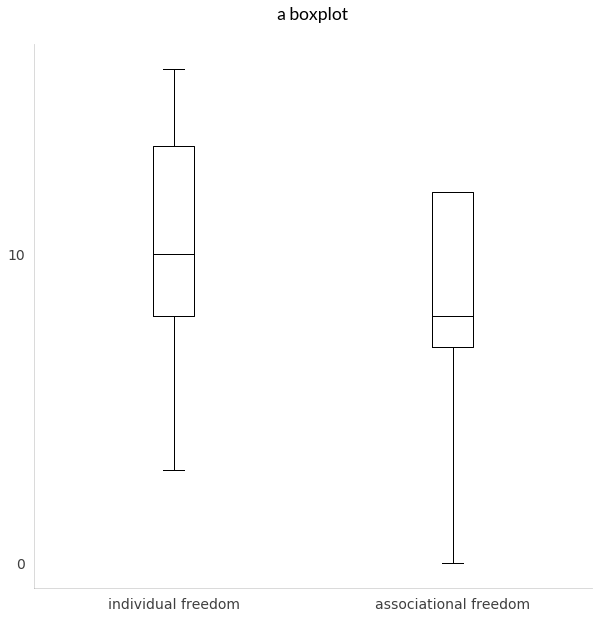

In [13]:
bptest = boxplot([roldf["per_auto"], df["assoc_org"]],
              ["individual freedom", "associational freedom"], 
              "a boxplot", notch=False)

In [14]:
bptest.get_main_plot().__dict__

{'_adjustable': 'box',
 '_agg_filter': None,
 '_alpha': None,
 '_anchor': 'C',
 '_animated': False,
 '_aspect': 'auto',
 '_autoscaleXon': False,
 '_autoscaleYon': True,
 '_axes': <matplotlib.axes._subplots.AxesSubplot at 0x10bf1ad68>,
 '_axes_locator': None,
 '_axisbelow': 'line',
 '_cachedRenderer': <matplotlib.backends.backend_agg.RendererAgg at 0x1121fd4a8>,
 '_clipon': True,
 '_clippath': None,
 '_connected': {},
 '_contains': None,
 '_current_image': None,
 '_facecolor': 'w',
 '_frameon': True,
 '_get_lines': <matplotlib.axes._base._process_plot_var_args at 0x1121d26d8>,
 '_get_patches_for_fill': <matplotlib.axes._base._process_plot_var_args at 0x1121d2358>,
 '_gid': None,
 '_gridOn': False,
 '_hold': True,
 '_label': '',
 '_left_title': Text(0,1,''),
 '_mouseover': False,
 '_navigate': True,
 '_navigate_mode': None,
 '_oid': 0,
 '_originalPosition': Bbox([[0.125, 0.125], [0.9, 0.88]]),
 '_path_effects': [],
 '_picker': None,
 '_position': Bbox([[0.125, 0.125], [0.9, 0.88]]),
 '_p

In [15]:
lines = bptest.get_main_plot().lines

In [16]:
lines

In [17]:
lines[0].__dict__

{'_agg_filter': None,
 '_alpha': None,
 '_animated': False,
 '_antialiased': True,
 '_axes': <matplotlib.axes._subplots.AxesSubplot at 0x10bf1ad68>,
 '_clipon': True,
 '_clippath': None,
 '_color': 'black',
 '_contains': None,
 '_dashOffset': None,
 '_dashSeq': None,
 '_dashcapstyle': 'butt',
 '_dashjoinstyle': 'round',
 '_drawstyle': 'default',
 '_gid': None,
 '_invalidx': False,
 '_invalidy': False,
 '_label': '_line0',
 '_linestyle': '-',
 '_linestyles': None,
 '_linewidth': 1.0,
 '_marker': <matplotlib.markers.MarkerStyle at 0x1121fd5c0>,
 '_markeredgecolor': 'auto',
 '_markeredgewidth': 1.0,
 '_markerfacecolor': 'auto',
 '_markerfacecoloralt': 'none',
 '_markersize': 6.0,
 '_markevery': None,
 '_mouseover': False,
 '_oid': 0,
 '_path': Path(array([[ 0.925,  8.   ],
        [ 1.075,  8.   ],
        [ 1.075, 13.5  ],
        [ 0.925, 13.5  ],
        [ 0.925,  8.   ]]), None),
 '_path_effects': [],
 '_picker': None,
 '_propobservers': {},
 '_rasterized': None,
 '_remove_method': <f

In [18]:
lines[0].color = 'red'

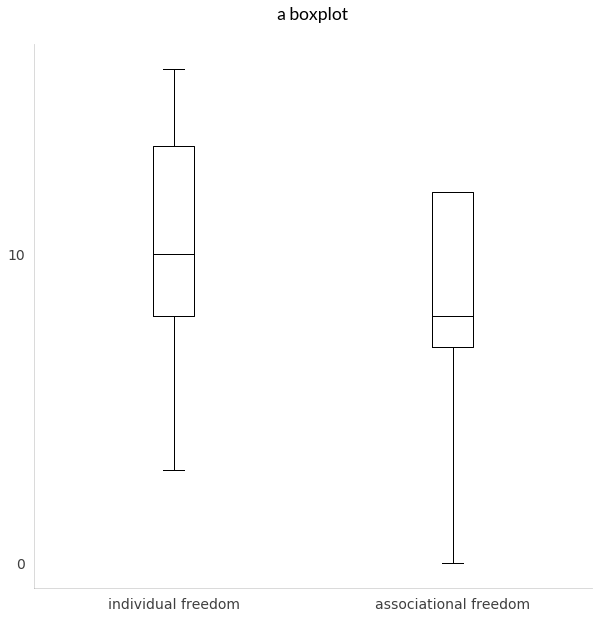

In [19]:
bptest

In [20]:
for line in lines:
    line.color="red"

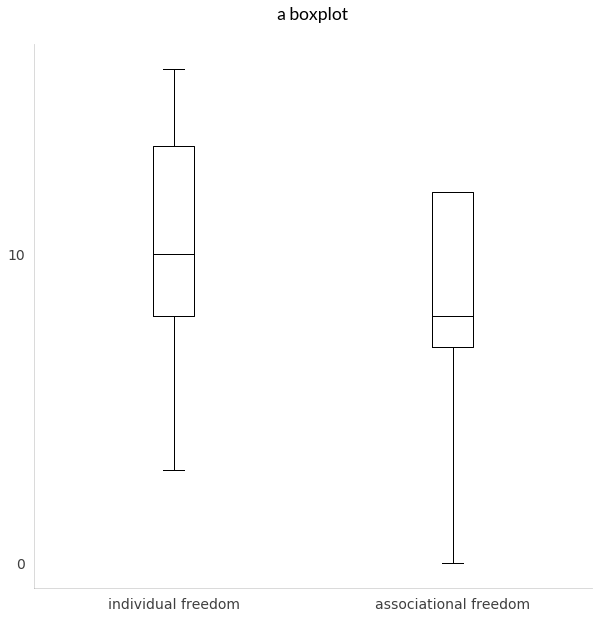

In [21]:
bptest

In [22]:
bptest.get_main_plot().lines[0].color

'red'

In [23]:
# oooh it's underscore
lines[0]._color = 'red'

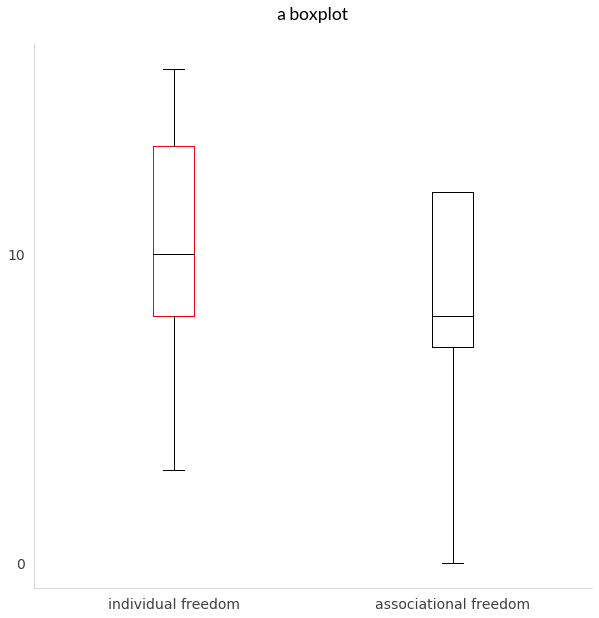

In [24]:
bptest

In [25]:
for line in lines:
    line._linewidth=1.5

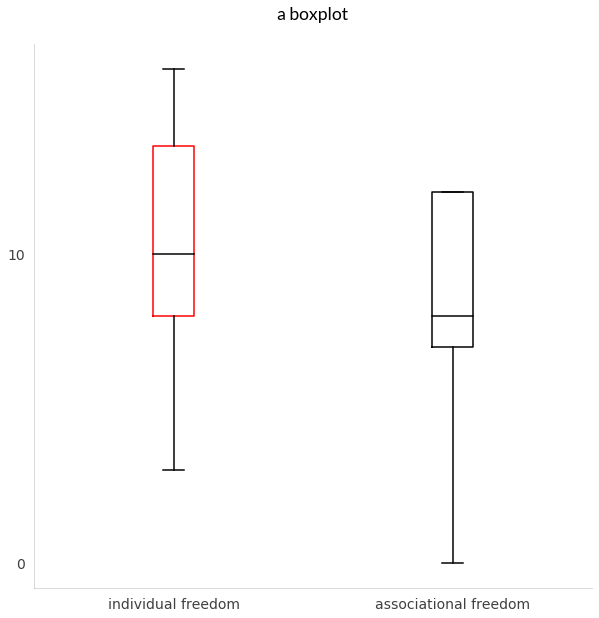

In [26]:
bptest

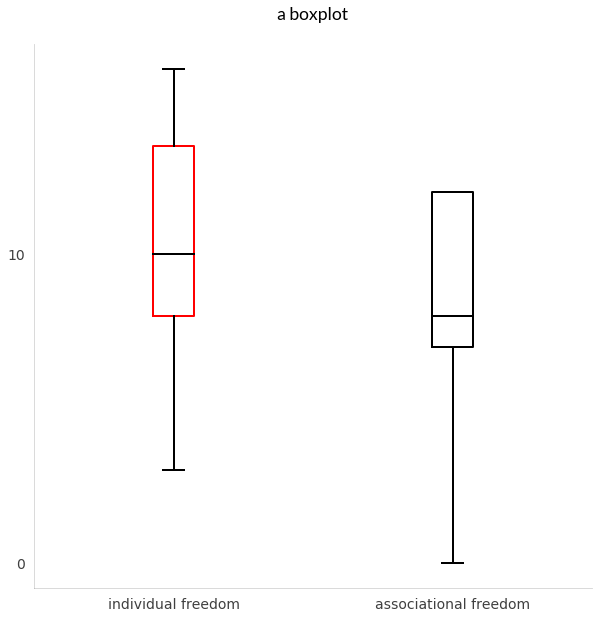

In [27]:
for line in lines:
    line._linewidth=2.0
bptest

In [30]:
def boxplot2(variables,
            labels,
            title="",
            numticks=3,
            labelsize=14,
            size=(10, 10),
            font="Lato",
            notch=True):
    arrays = [np.sort(np.array(x)) for x in variables]

    fig = plt.figure(figsize=size, FigureClass=PlottyFig)
    ax = fig.add_subplot(1, 1, 1)

    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname=font)

    ax = remove_chart_junk(ax, numticks, labelsize)

    bp = ax.boxplot(arrays, notch=notch, sym="k.", labels=labels)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color="black", linewidth = 1.75)
    return fig


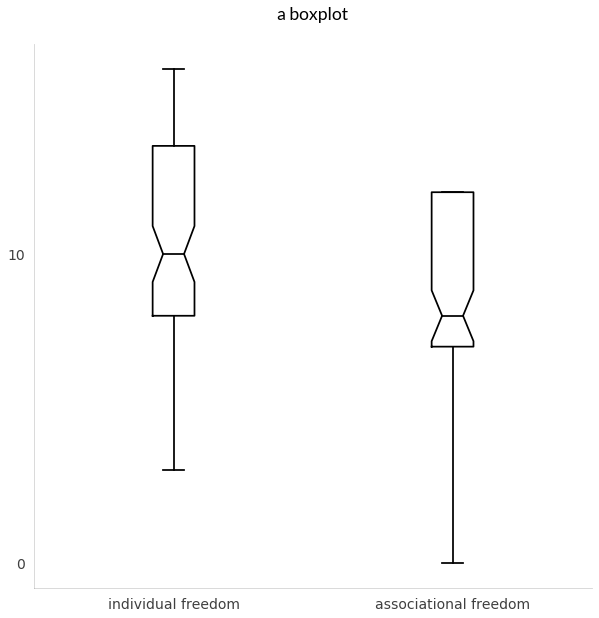

In [31]:
bptest2 = boxplot2([roldf["per_auto"], df["assoc_org"]],
              ["individual freedom", "associational freedom"], 
              "a boxplot")

In [32]:
class PlottyFig(matplotlib.figure.Figure):

    def get_main_plot(self):
        return self._axstack.as_list()[0]

    def get_lines(self):
        return self._axstack.as_list()[0].lines

    def set_line_width(self, width):
        for line in self._axstack.as_list()[0].lines:
            line._linewidth = width

    def change_title(self, title):
        self._axstack.as_list()[0].set_title(title)


In [33]:
def get_ci_values(fitted_regression, alpha):
    _, sumdata, _ = summary_table(fitted_regression, alpha=alpha)
    ci_low, ci_high = sumdata[:, 4:6].T
    return ci_low, ci_high


def scatterplot(x, y, title="",
                xlabel="",
                ylabel="",
                numticks=3,
                labelsize=15,
                dotsize=8,
                ylabel_wrapping=6,
                size=(10, 10),
                fit_line=True,
                confidence=True,
                alpha=0.05,
                font="Lato"):

    # everything works better with numpy arrays
    x = np.array(x)
    y = np.array(y)

    # generate the fitted values and confidence intervals
    if fit_line:
        regline = sm.OLS(y, sm.add_constant(x)).fit()
        if confidence:
            ci_low, ci_high = get_ci_values(regline, alpha)

    # baseline plot
    fig = plt.figure(figsize=size, FigureClass=PlottyFig)
    ax = fig.add_subplot(1, 1, 1)

    # label all the things
    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname=font)
    ax.set_xlabel(xlabel,
                  fontsize=labelsize,
                  labelpad=labelsize * 0.7,
                  color=(0.15, 0.15, 0.15),
                  fontname=font)
    ax.set_ylabel(textwrap.fill(ylabel, ylabel_wrapping),
                  fontsize=labelsize,
                  labelpad=labelsize * 2,
                  color=(0.15, 0.15, 0.15),
                  rotation='horizontal',
                  horizontalalignment='center',
                  fontname=font)

    # matplotlib tends to get broken if you don't sort the data first, so
    x_sorted = np.sort(x)
    y_sorted = y[np.argsort(x)]
    if fit_line:
        fitted = regline.fittedvalues[np.argsort(x)]
        if confidence:
            lowband = ci_low[np.argsort(x)]
            highband = ci_high[np.argsort(x)]

    # plot the basic scatterplot
    ax.plot(x_sorted, y_sorted, 'k.', ms=dotsize)

    ax = remove_chart_junk(ax, numticks, labelsize)

    # plot regression line in grey, transparent enough for dots to show through
    if fit_line:
        ax.plot(x_sorted, fitted, color=(0.1, 0.1, 0.1, 0.2), linewidth=2)
        # fill space between confidence interval endpoints and regression line in lighter grey

        # plot bands for confidence intervals
        if confidence:
            ax.fill_between(x_sorted, lowband, fitted, facecolor=(0.7, 0.7, 0.7, 0.2))
            ax.fill_between(x_sorted, highband, fitted, facecolor=(0.7, 0.7, 0.7, 0.2))

    return fig


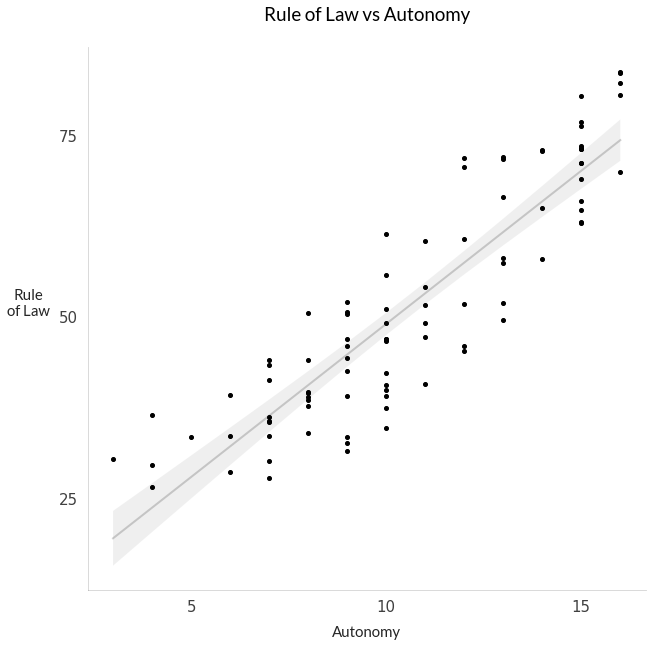

In [34]:
sp = scatterplot(roldf["per_auto"], 
              roldf["RoLScore"], 
              "Rule of Law vs Autonomy", 
              "Autonomy", 
              "Rule of Law")

In [35]:
sp.set_line_width(2.0)

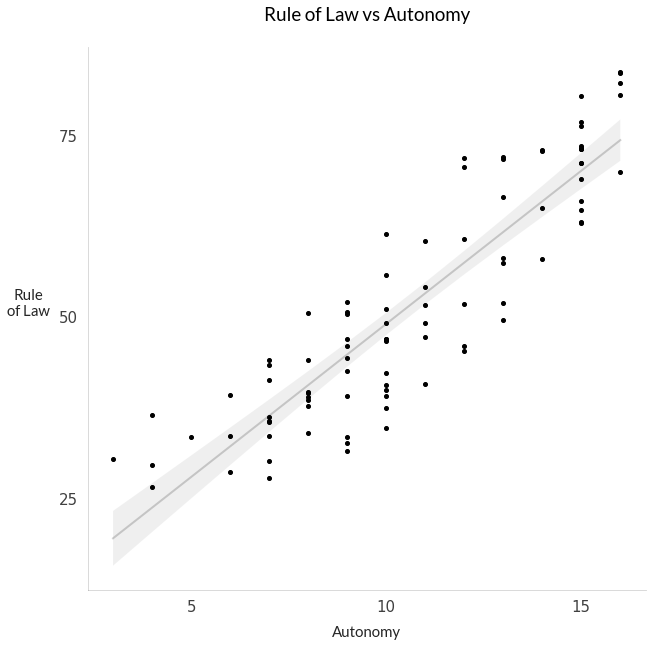

In [36]:
sp

In [37]:
sp.get_lines()

In [38]:
sp.set_line_width(0.5)

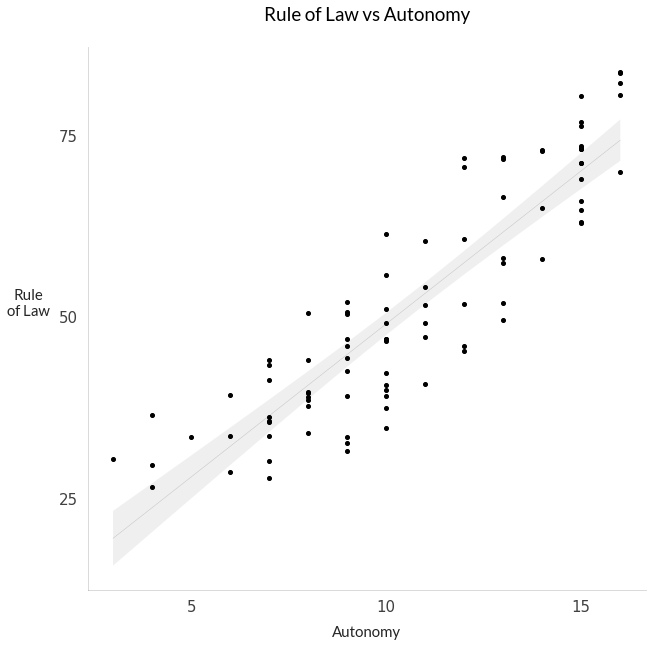

In [39]:
sp

In [40]:
bptest2.savefig("boxplot2.svg", format="svg")

In [49]:
def histogram(variable,
              bins="auto",
              title="",
              numticks=5,
              labelsize=15,
              size=(10, 10),
              add_kde=False,
              kernel_param=0.4,
              show_n=True,
              font="Lato"):
    var = np.sort(np.array(variable))

    fig = plt.figure(figsize=size, FigureClass=PlottyFig)
    ax = fig.add_subplot(1, 1, 1)

    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname=font)

    ax = remove_chart_junk(ax, numticks, labelsize)

    if add_kde:
        density = True
    else:
        density = False

    if show_n:
        ax.set_xlabel("n = " + str(var.size),
                      fontsize=labelsize,
                      labelpad=labelsize * 0.7,
                      color=(0.15, 0.15, 0.15),
                      fontname=font)

    ax.hist(var, bins=bins, density=density, lw=0)

    # fix bar colors
    bars = [x for x in ax.get_children() if type(x) is matplotlib.patches.Rectangle]
    for idx, bar in enumerate(bars):
        if idx % 2 == 0:
            bar.set_color((0.1, 0.1, 0.1, 0.3))
        else:
            bar.set_color((0.4, 0.4, 0.4, 0.3))
    bars[-1].set_color("white")

    if add_kde:
        ds = gaussian_kde(var)
        mx = np.max(var)
        mn = np.min(var)
        ls = np.linspace(mn, mx)
        ds.covariance_factor = lambda : kernel_param
        ds._compute_covariance()
        dy = ds(ls)
        ax.plot(ls, dy, color=(0.1, 0.1, 0.1, 0.8))
        ax.set_yticks([])
        ax.spines['left'].set_visible(False)

    return fig

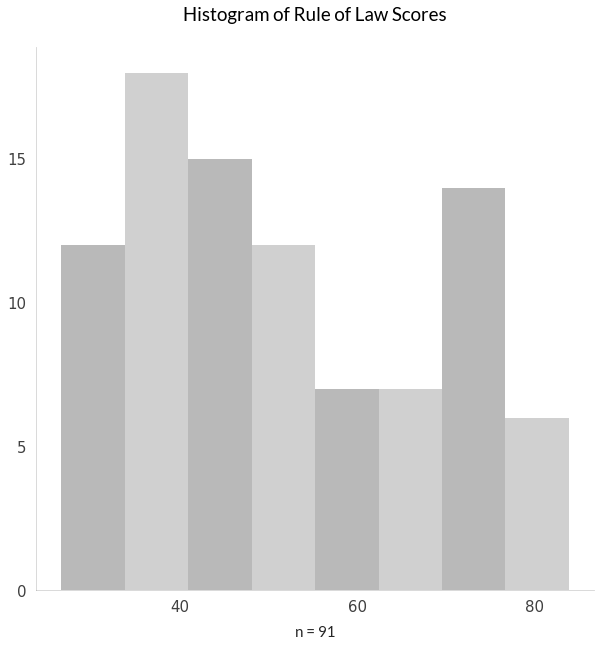

In [50]:
h1 = histogram(roldf["RoLScore"], title="Histogram of Rule of Law Scores", add_kde=False)

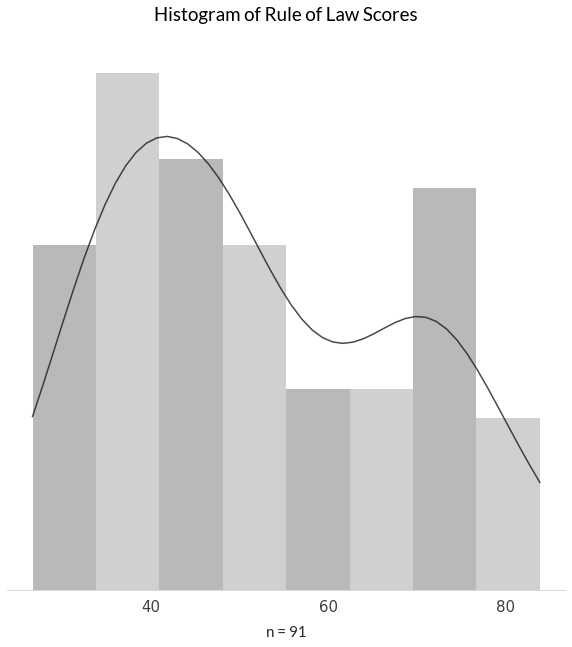

In [51]:
h2 = histogram(roldf["RoLScore"], title="Histogram of Rule of Law Scores", add_kde=True)

In [52]:
h2.savefig("fancyhist.svg", format="svg")

In [53]:
def timeseries(in_dates,
               events,
               labels=["", ""],
               title="",
               numticks=3,
               labelsize=12,
               size=(10, 10),
               font="Lato"):
    fig = plt.figure(figsize=size, FigureClass=PlottyFig)
    ax = fig.add_subplot(1, 1, 1)
    numticks = 5

    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname=font)

    ax = remove_chart_junk(ax, numticks, labelsize)

    dates = np.array(in_dates)
    dates_sorted = (np.sort(dates))
    event1 = np.array(events[0])[np.argsort(dates)]
    p1 = ax.plot(dates_sorted, event1, 'k-', label=labels[0])
    if len(events) > 1:
        event2 = np.array(events[1])[np.argsort(dates)]
        p2 = ax.plot(dates_sorted, event2, color=(0.6, 0.6, 0.6), linestyle='-', label=labels[1])
        leg = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, framealpha=0)
        leg.get_texts()[1].set_color((0.4, 0.4, 0.4))
    return fig


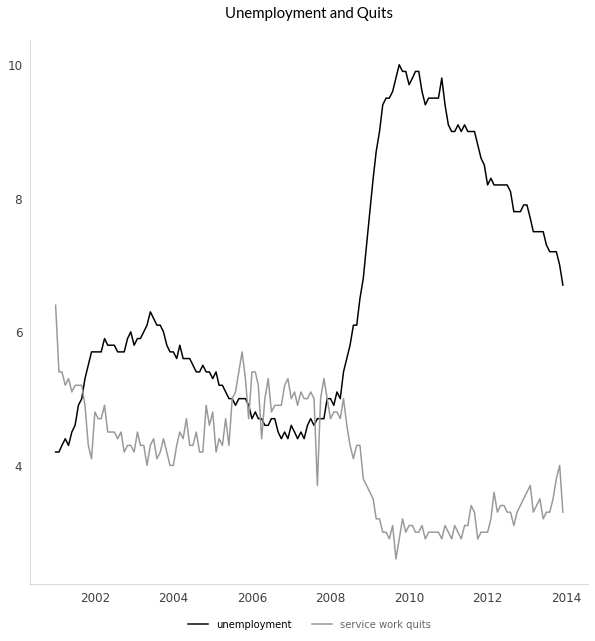

In [54]:
ts = timeseries(tsdf["Year"], [tsdf["Unemployment Rate"], tsdf["Accommodation and food services Quit rate"]], ["unemployment", "service work quits"], "Unemployment and Quits")